# The Battle of Neighborhoods

## Restaurant Recommender System in Bangalore, India

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data/complete_dataset.csv')
df.head()

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [5]:
bangalore_population.to_csv('data/population_dataset.csv')

In [7]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [8]:
bangalore_income.to_csv('data/income_dataset.csv')

In [9]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [10]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150

In [11]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [12]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))
borough_colors

{'Central': '#F7456B',
 'Eastern': '#B3EA7C',
 'NorthEastern': '#6CFB0B',
 'Northern': '#0D8D4C',
 'SouthEastern': '#2177AF',
 'Southern': '#538AF2',
 'SouthernSuburbs': '#8C64B9',
 'Western': '#17EFFB'}

In [13]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [14]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)
bangalore_map

# Exploring bangalore Neighborhoods using FourSquare API

In [15]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [16]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [17]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  601


In [18]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
2,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
3,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [19]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       115
Café                     31
Fast Food Restaurant     30
Bakery                   24
Department Store         22
Ice Cream Shop           21
Pizza Place              20
Coffee Shop              18
Chinese Restaurant       15
Hotel                    10
Name: Neighborhood, dtype: int64

In [20]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  126


# Getting number of venues per neighborhood

In [21]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             5
        Domlur                     10
        Indiranagar                66
        Jeevanbheemanagar           4
        Malleswaram                 6
...                               ...
Western Nagarbhavi                  6
        Nandini Layout              3
        Nayandahalli                3
        Rajarajeshwari Nagar        6
        Vijayanagar                 4

[62 rows x 1 columns]

In [22]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [23]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [24]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,10
2,Central,Indiranagar,66
3,Central,Jeevanbheemanagar,4
4,Central,Malleswaram,6
...,...,...,...
57,Western,Nagarbhavi,6
58,Western,Nandini Layout,3
59,Western,Nayandahalli,3
60,Western,Rajarajeshwari Nagar,6


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Electron

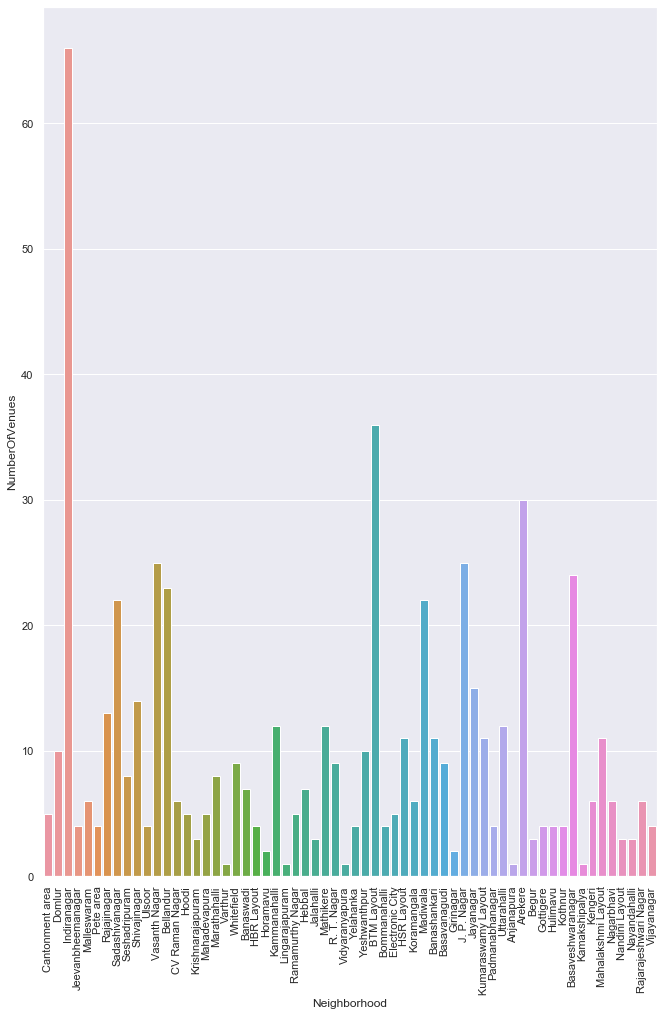

In [25]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

### From the above graph, we see that Inderanagar has the most number of venues.

# Exploring Whitefield venues

In [26]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
232,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
233,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
234,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
235,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
236,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
237,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
238,Whitefield,Eastern,12.9698,77.7499,Calvin's,12.973117,77.749514,Café
239,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café
240,Whitefield,Eastern,12.9698,77.7499,Onions,12.965671,77.748877,Indian Restaurant


# One hot encoding for letting us to compare different venues based on some common scale

In [27]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Arekere,0.00,0.0,0.0,0.0,0.033333,0.0,0.0,0.033333,0.033333,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,BTM Layout,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.055556,...,0.0,0.0,0.00,0.0,0.0,0.055556,0.0,0.0,0.0,0.0
3,Banashankari,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Banaswadi,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.142857,...,0.0,0.0,0.00,0.0,0.0,0.142857,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Vidyaranyapura,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
58,Vijayanagar,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.250000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
59,Whitefield,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.111111,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
60,Yelahanka,0.25,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [29]:
number_of_top_venues = 5

In [30]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                  Venue  Frequency
0                    Venue Category_ATM        1.0
1        Venue Category_Motorcycle Shop        0.0
2               Venue Category_Pharmacy        0.0
3  Venue Category_Performing Arts Venue        0.0
4                   Venue Category_Park        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.20
1  Venue Category_Sporting Goods Shop       0.13
2     Venue Category_Department Store       0.10
3          Venue Category_Pizza Place       0.07
4   Venue Category_Mughlai Restaurant       0.07


--------- BTM Layout ---------
                              Venue  Frequency
0  Venue Category_Indian Restaurant       0.22
1        Venue Category_Snack Place       0.08
2     Venue Category_Ice Cream Shop       0.08
3             Venue Category_Bakery       0.06
4     Venue Category_Sandwich Place       0.06


--------- Banashankari



--------- Malleswaram ---------
                              Venue  Frequency
0     Venue Category_Ice Cream Shop       0.50
1  Venue Category_Indian Restaurant       0.17
2     Venue Category_Breakfast Spot       0.17
3             Venue Category_Bakery       0.17
4                Venue Category_ATM       0.00


--------- Marathahalli ---------
                                Venue  Frequency
0       Venue Category_Clothing Store       0.50
1    Venue Category_Indian Restaurant       0.12
2       Venue Category_Ice Cream Shop       0.12
3  Venue Category_Sporting Goods Shop       0.12
4           Venue Category_Shoe Store       0.12


--------- Mathikere ---------
                              Venue  Frequency
0  Venue Category_Indian Restaurant       0.42
1   Venue Category_Department Store       0.08
2        Venue Category_Bus Station       0.08
3     Venue Category_Cosmetics Shop       0.08
4     Venue Category_Sandwich Place       0.08


--------- Nagarbhavi ---------
        

### Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants

In [31]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [32]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_French Restaurant,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Neighborhood,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Business Service,Venue Category_Bus Line
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Bakery,Venue Category_Fast Food Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Sandwich Place,Venue Category_Coffee Shop,Venue Category_Vegetarian / Vegan Restaurant
3,Banashankari,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Sporting Goods Shop,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Pizza Place,Venue Category_Bakery
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Café,Venue Category_Bakery,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Electronics Store


In [33]:
neighborhoods_venues_sorted.shape

(62, 11)

# Next challenge is to find the optimal k value for clustering and we do it using the elbow method

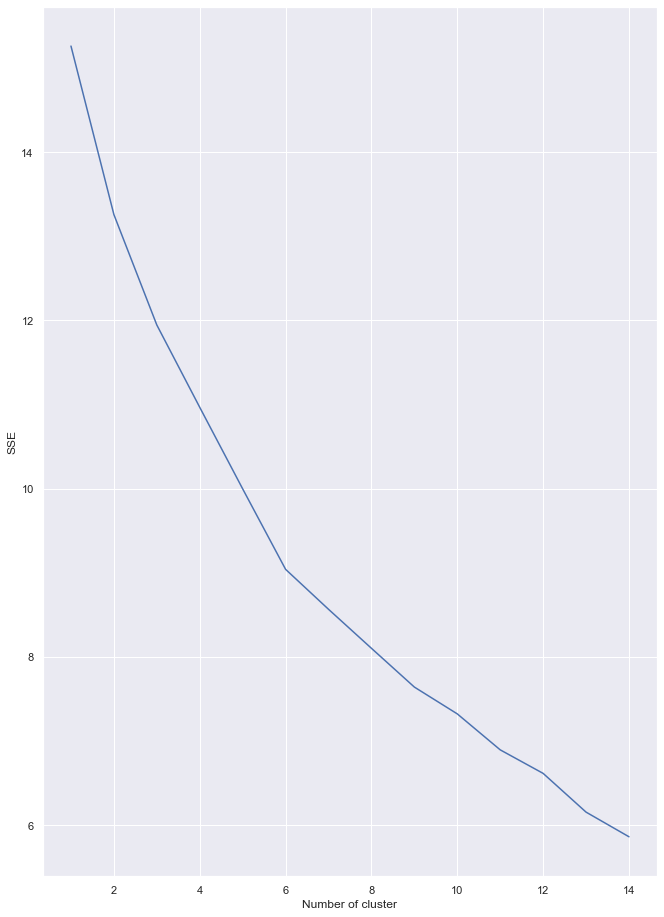

In [34]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### From the above graph, we can see the optimal value for cluster is 5.

In [35]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [36]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    23
1    10
2    21
3     4
4     4
Name: Neighborhood, dtype: int64

In [37]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       'Venue Category_Badminton Court', 'Venue Category_Bakery',
       ...
       'Venue Category_Toll Plaza', 'Venue Category_Train Station',
       'Venue Category_Travel & Transport', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Wine Bar',
       'Venue Category_Women's Store', 'Venue Category_Yoga Studio',
       'Cluster'],
      dtype='object', length=128)

In [38]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_French Restaurant,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Neighborhood,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Business Service,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Bakery,Venue Category_Fast Food Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Sandwich Place,Venue Category_Coffee Shop,...,0.0,0.00,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0
3,Banashankari,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Sporting Goods Shop,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Pizza Place,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Café,Venue Category_Bakery,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,0.0,0.00,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Vidyaranyapura,Venue Category_Bus Station,Venue Category_Yoga Studio,Venue Category_Deli / Bodega,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4
58,Vijayanagar,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Dessert Shop,Venue Category_Lounge,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
59,Whitefield,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Kerala Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Hotel Bar,Venue Category_Diner,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2
60,Yelahanka,Venue Category_ATM,Venue Category_Train Station,Venue Category_Smoke Shop,Venue Category_Pizza Place,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,...,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2


In [39]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [40]:
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [41]:
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


In [42]:
map_clusters

# Finding similar locations based on user input (recommending location)
### We need to analyze factors such as population and Income to recommend.

In [44]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [45]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [46]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [47]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [48]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Recommending Veg restaurants

In [49]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,2,0,0,0,0
3,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [50]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
     ..
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 62, dtype: uint8

In [51]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [52]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [53]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [54]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

### Building a target neighborhood by providing a sample restaurant : say ' Whitefield '

In [55]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,578,Whitefield,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Kerala Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Hotel Bar,...,0.0,0.0,2,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,579,Whitefield,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Kerala Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Hotel Bar,...,0.0,0.0,2,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,580,Whitefield,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Kerala Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Hotel Bar,...,0.0,0.0,2,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,581,Whitefield,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Kerala Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Hotel Bar,...,0.0,0.0,2,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,582,Whitefield,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Kerala Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Hotel Bar,...,0.0,0.0,2,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,583,Whitefield,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Kerala Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Hotel Bar,...,0.0,0.0,2,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
6,584,Whitefield,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Kerala Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Hotel Bar,...,0.0,0.0,2,Eastern,12.9698,77.7499,Calvin's,12.973117,77.749514,Café
7,585,Whitefield,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Kerala Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Hotel Bar,...,0.0,0.0,2,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café
8,586,Whitefield,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Kerala Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Eastern European Restaurant,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Hotel Bar,...,0.0,0.0,2,Eastern,12.9698,77.7499,Onions,12.965671,77.748877,Indian Restaurant


In [56]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']
target_cluster

2

In [57]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
94,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Western,12.9886,77.5383,Priyadarshini Grand,12.990235,77.538020,Fast Food Restaurant
95,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Western,12.9886,77.5383,Polar Bear,12.991461,77.538832,Ice Cream Shop
96,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Western,12.9886,77.5383,Gold's gym,12.991855,77.538492,Gym
97,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Western,12.9886,77.5383,Bansuri Sweets,12.986912,77.539698,Indian Restaurant
98,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Western,12.9886,77.5383,Baskin-Robbins,12.991218,77.538903,Ice Cream Shop


In [58]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 231 neighborhoods which has similar characteristics to Whitefield.


In [59]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,94,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,...,0.0,0.0,2,Western,12.9886,77.5383,Priyadarshini Grand,12.990235,77.538020,Fast Food Restaurant
1,95,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,...,0.0,0.0,2,Western,12.9886,77.5383,Polar Bear,12.991461,77.538832,Ice Cream Shop
2,96,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,...,0.0,0.0,2,Western,12.9886,77.5383,Gold's gym,12.991855,77.538492,Gym
3,97,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,...,0.0,0.0,2,Western,12.9886,77.5383,Bansuri Sweets,12.986912,77.539698,Indian Restaurant
4,98,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,...,0.0,0.0,2,Western,12.9886,77.5383,Baskin-Robbins,12.991218,77.538903,Ice Cream Shop


In [60]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

C:\Users\sreej\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Now we need to create ranking by combining population and income factors as well

In [61]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [62]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,Venue Category_Gym / Fitness Center,...,Priyadarshini Grand,12.990235,77.538020,Fast Food Restaurant,628910,0.639387,41177.478492,0.636984,0,1.0
1,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,Venue Category_Gym / Fitness Center,...,Polar Bear,12.991461,77.538832,Ice Cream Shop,628910,0.639387,41177.478492,0.636984,0,1.0
2,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,Venue Category_Gym / Fitness Center,...,Gold's gym,12.991855,77.538492,Gym,628910,0.639387,41177.478492,0.636984,0,1.0
3,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,Venue Category_Gym / Fitness Center,...,Bansuri Sweets,12.986912,77.539698,Indian Restaurant,628910,0.639387,41177.478492,0.636984,0,1.0
4,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Juice Bar,Venue Category_Miscellaneous Shop,Venue Category_Burger Joint,Venue Category_Sporting Goods Shop,Venue Category_Gym / Fitness Center,...,Baskin-Robbins,12.991218,77.538903,Ice Cream Shop,628910,0.639387,41177.478492,0.636984,0,1.0


In [63]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Sadashivanagar,Venue Category_Coffee Shop,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Spa,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Women's Store,...,13.007536,77.579553,Café,662625,0.673664,59943.541564,0.92728,0,1.0,0.76138
1,Sadashivanagar,Venue Category_Coffee Shop,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Spa,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Women's Store,...,13.007618,77.577925,Ice Cream Shop,662625,0.673664,59943.541564,0.92728,0,1.0,0.76138
2,Sadashivanagar,Venue Category_Coffee Shop,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Spa,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Women's Store,...,13.003889,77.578540,Spa,662625,0.673664,59943.541564,0.92728,0,1.0,0.76138
3,Sadashivanagar,Venue Category_Coffee Shop,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Spa,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Women's Store,...,13.006796,77.578870,Snack Place,662625,0.673664,59943.541564,0.92728,0,1.0,0.76138
4,Sadashivanagar,Venue Category_Coffee Shop,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Department Store,Venue Category_Ice Cream Shop,Venue Category_Spa,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Women's Store,...,13.007597,77.579245,Fast Food Restaurant,662625,0.673664,59943.541564,0.92728,0,1.0,0.76138


In [64]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()
top3_df = pd.DataFrame(top3).reset_index()
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,[0.6426377807870477]
1,Electronic City,Venue Category_Furniture / Home Store,Venue Category_Outlet Store,Venue Category_Bus Stop,[0.5423513638809381]
2,Indiranagar,Venue Category_Pub,Venue Category_Lounge,Venue Category_Indian Restaurant,[0.5684483844100865]


### According the data, we see that Basaveshwaranagar, Electronic City and Indiranagar are the top 3 neighborhoods to find similar food to Whitefield restaurant!
#### Our model will recommend these neighborhoods and top 3 common venues to visit as well.